In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [3]:
df.dtypes

Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object

In [4]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [5]:
df["Blood Pressure"].unique()

array(['126/83', '125/80', '140/90', '120/80', '132/87', '130/86',
       '117/76', '118/76', '128/85', '131/86', '128/84', '115/75',
       '135/88', '129/84', '130/85', '115/78', '119/77', '121/79',
       '125/82', '135/90', '122/80', '142/92', '140/95', '139/91',
       '118/75'], dtype=object)

In [6]:
# 90/60 - 120/80 -> normal
# < 90/60 --> rendah
# > 120/60 -- hipertensi

encoding = {'126/83':'Hipertensi', '125/80':'Hipertensi', '140/90':'Hipertensi', '120/80':'Normal', '132/87':'Hipertensi', '130/86':'Hipertensi',
       '117/76':'Normal', '118/76':'Normal', '128/85':'Hipertensi', '131/86':'Hipertensi', '128/84':'Hipertensi', '115/75':'Normal',
       '135/88':'Hipertensi', '129/84':'Hipertensi', '130/85':'Hipertensi', '115/78':'Normal', '119/77':'Normal', '121/79':'Normal',
       '125/82':'Hipertensi', '135/90':'Hipertensi', '122/80':'Normal', '142/92':'Hipertensi', '140/95':'Hipertensi', '139/91':'Hipertensi',
       '118/75':'Normal'}

df['Blood Pressure Encoded'] = df['Blood Pressure'].replace(encoding)


In [7]:
df.isna().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
Blood Pressure Encoded       0
dtype: int64

In [8]:
df['Sleep Disorder'].fillna("Normal", inplace=True)

In [9]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Blood Pressure Encoded
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,Normal,Hipertensi
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Normal,Hipertensi
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Normal,Hipertensi
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,Hipertensi
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,Hipertensi


In [10]:
df['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

In [11]:
df['BMI Category'] = df['BMI Category'].replace({'Normal Weight':'Normal'})

In [12]:
df['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese'], dtype=object)

In [13]:
df['Physical Activity Level'].describe()

count    374.000000
mean      59.171123
std       20.830804
min       30.000000
25%       45.000000
50%       60.000000
75%       75.000000
max       90.000000
Name: Physical Activity Level, dtype: float64

In [14]:
df['Physical Activity Level'] = np.where(df['Physical Activity Level'] < 60, 'Low', np.where(df['Physical Activity Level'] > 60, 'High', 'Normal'))

In [15]:
df['Physical Activity Level'].unique()

array(['Low', 'Normal', 'High'], dtype=object)

In [16]:
df['Quality of Sleep'].describe()

count    374.000000
mean       7.312834
std        1.196956
min        4.000000
25%        6.000000
50%        7.000000
75%        8.000000
max        9.000000
Name: Quality of Sleep, dtype: float64

In [17]:
df['Stress Level'].unique()

array([6, 8, 7, 4, 3, 5], dtype=int64)

In [18]:
df['Stress Level'].describe()

count    374.000000
mean       5.385027
std        1.774526
min        3.000000
25%        4.000000
50%        5.000000
75%        7.000000
max        8.000000
Name: Stress Level, dtype: float64

In [19]:
df['Stress Level'] = df['Stress Level'].replace({3:'Low', 4:'Low', 5:'Normal', 6:'Normal', 7:'High', 8:'High'})

In [20]:
df['Stress Level'].unique()

array(['Normal', 'High', 'Low'], dtype=object)

In [21]:
df.to_csv("Sleep health clean nuril.csv", index=False)

In [40]:
df['Occupation'].unique()

array(['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher',
       'Nurse', 'Engineer', 'Accountant', 'Scientist', 'Lawyer',
       'Salesperson', 'Manager'], dtype=object)

# Test Heatmap

In [22]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [23]:
df['Gender Encoding'] = df['Gender'].replace({'Male':0,'Female':1})


In [24]:
df['Occupation'].unique()

array(['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher',
       'Nurse', 'Engineer', 'Accountant', 'Scientist', 'Lawyer',
       'Salesperson', 'Manager'], dtype=object)

In [25]:
encoding = {'Software Engineer':1, 'Doctor':2, 'Sales Representative':3, 'Teacher':4,
       'Nurse':5, 'Engineer':6, 'Accountant':7, 'Scientist':8, 'Lawyer':9,
       'Salesperson':10, 'Manager':11}
df['Occupation Encoding'] = df['Occupation'].replace(encoding)

In [26]:
df['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese'], dtype=object)

In [27]:
df['BMI Category'] = df['BMI Category'].replace({'Overweight':1, 'Normal':2, 'Obese':3, 'Normal Weight':4})

In [28]:
df['Blood Pressure Encoded'].unique()

array(['Hipertensi', 'Normal'], dtype=object)

In [29]:
df['Blood Pressure Encoded Fix'] = df['Blood Pressure Encoded'].replace({'Normal':0, 'Hipertensi':1})

In [30]:
df['Sleep Disorder'].unique()

array(['Normal', 'Sleep Apnea', 'Insomnia'], dtype=object)

In [31]:
df['Sleep Disorder Encoded'] = df['Sleep Disorder'].replace({'Normal':0, 'Sleep Apnea':1, 'Insomnia':2})

In [32]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Blood Pressure Encoded,Gender Encoding,Occupation Encoding,Blood Pressure Encoded Fix,Sleep Disorder Encoded
0,1,Male,27,Software Engineer,6.1,6,Low,Normal,1,126/83,77,4200,Normal,Hipertensi,0,1,1,0
1,2,Male,28,Doctor,6.2,6,Normal,High,2,125/80,75,10000,Normal,Hipertensi,0,2,1,0
2,3,Male,28,Doctor,6.2,6,Normal,High,2,125/80,75,10000,Normal,Hipertensi,0,2,1,0
3,4,Male,28,Sales Representative,5.9,4,Low,High,3,140/90,85,3000,Sleep Apnea,Hipertensi,0,3,1,1
4,5,Male,28,Sales Representative,5.9,4,Low,High,3,140/90,85,3000,Sleep Apnea,Hipertensi,0,3,1,1


In [33]:
df['Quality of Sleep'].unique()

array([6, 4, 7, 5, 8, 9], dtype=int64)

In [34]:
col = ['Sleep Duration', 'BMI Category', 'Gender Encoding', 'Occupation Encoding', 'Blood Pressure Encoded Fix', 'Sleep Disorder Encoded']

In [35]:
correlation_matrix = df[col].corr()

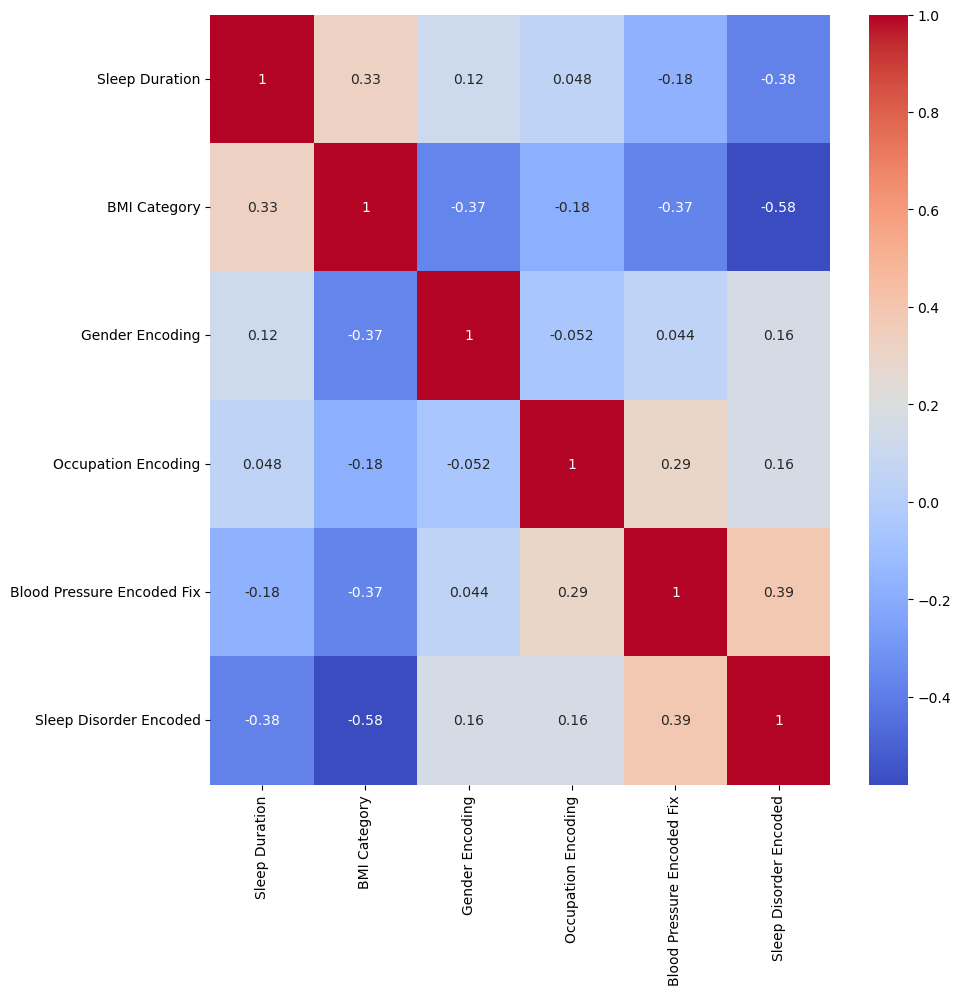

In [36]:
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

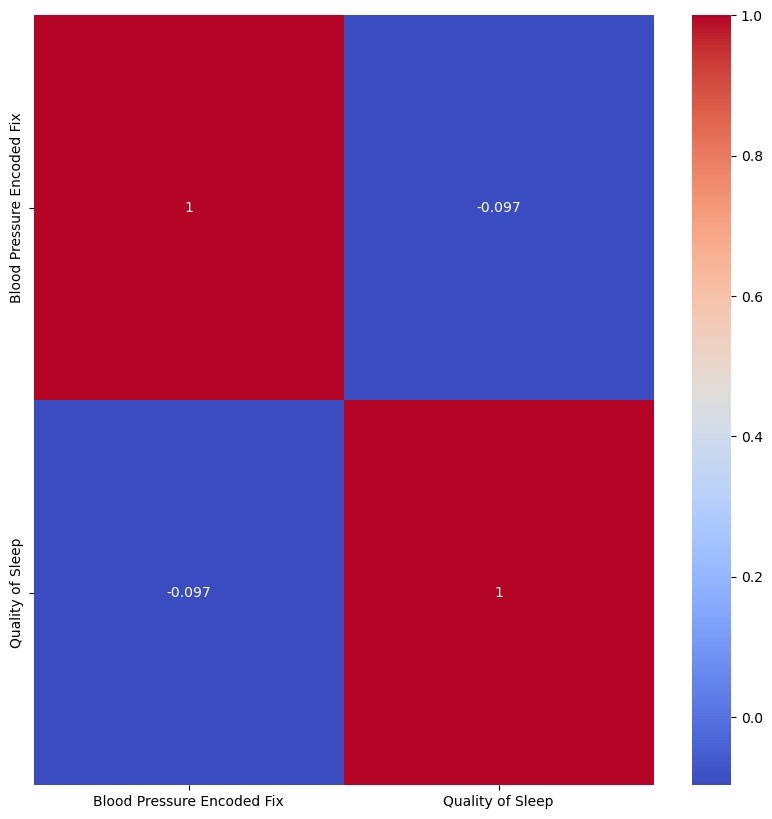

In [37]:
col = ['Blood Pressure Encoded Fix', 'Quality of Sleep']
correlation_matrix = df[col].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [38]:
df['BMI Category'].unique()

array([1, 2, 3], dtype=int64)